In [261]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

In [229]:
used_device_data= pd.read_csv("used_device_data (1).csv")

In [231]:
used_device_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [169]:
used_device_data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [141]:
used_device_data.shape

(3454, 15)

In [299]:
# Check for missing values
missing_values = used_device_data.isnull().sum()
missing_values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [143]:
# Fill missing values for numerical columns with mean
for column in ['ram', 'battery', 'screen_size', 'weight']:
    used_device_data[column].fillna(used_device_data[column].mean(), inplace=True)

# Fill missing values for categorical columns with mode
for column in ['brand_name', 'os']:
     used_device_data[column].fillna(used_device_data[column].mode()[0], inplace=True)

C:\Users\chedeema\AppData\Local\Temp\ipykernel_8548\2983821358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_device_data[column].fillna(used_device_data[column].mean(), inplace=True)
C:\Users\chedeema\AppData\Local\Temp\ipykernel_8548\2983821358.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [171]:
# Create a new feature 'device_age'
used_device_data['device_age'] = 2024 - used_device_data['release_year']

In [147]:
used_device_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,device_age
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,4
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,4
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,4
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,4


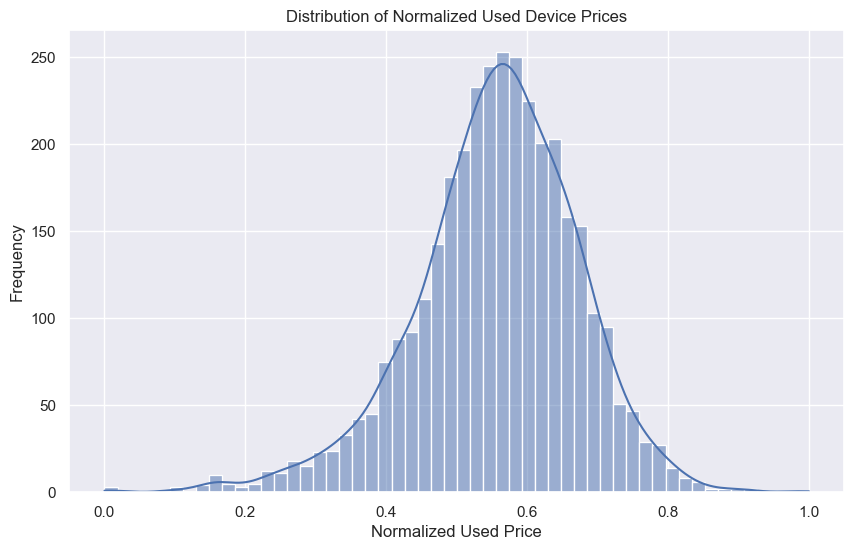

In [151]:
# Normalize used prices distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(used_device_data['normalized_used_price'], kde=True)
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.show()

In [153]:
# Percentage of the used device market dominated by Android devices
android_devices = used_device_data[used_device_data['os'] == 'Android']
android_market_percentage = (len(android_devices) / len(used_device_data)) * 100

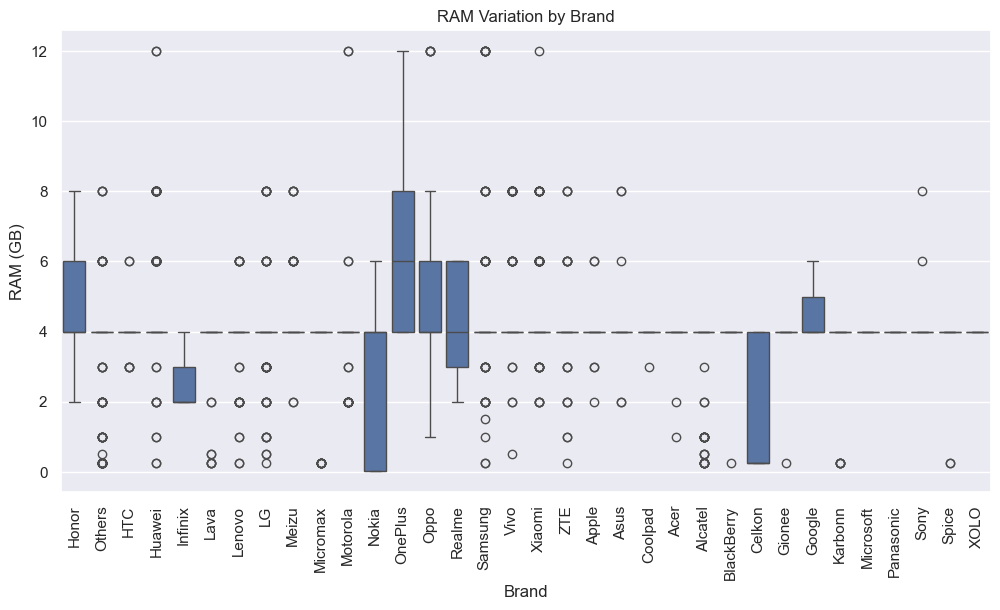

In [173]:
# RAM variation with brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='ram', data=used_device_data)
plt.title('RAM Variation by Brand')
plt.xlabel('Brand')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=90)
plt.show()

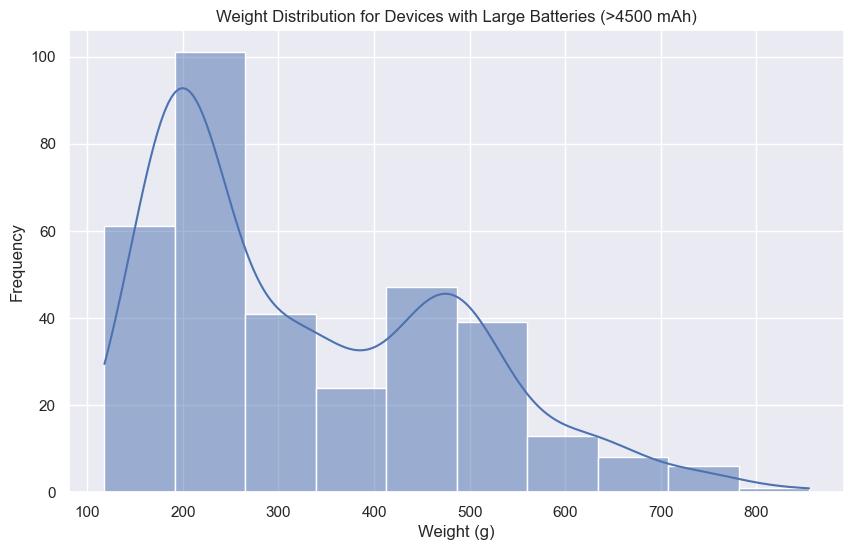

In [177]:
# Weight variation for phones and tablets with large batteries
large_battery_devices = used_device_data[used_device_data['battery'] > 4500]
plt.figure(figsize=(10, 6))
sns.histplot(large_battery_devices['weight'], kde=True)
plt.title('Weight Distribution for Devices with Large Batteries (>4500 mAh)')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

In [181]:
# Number of devices with screen size larger than 6 inches by brand
large_screen_devices = used_device_data[used_device_data['screen_size'] > 6]
large_screen_device_counts = large_screen_devices['brand_name'].value_counts()

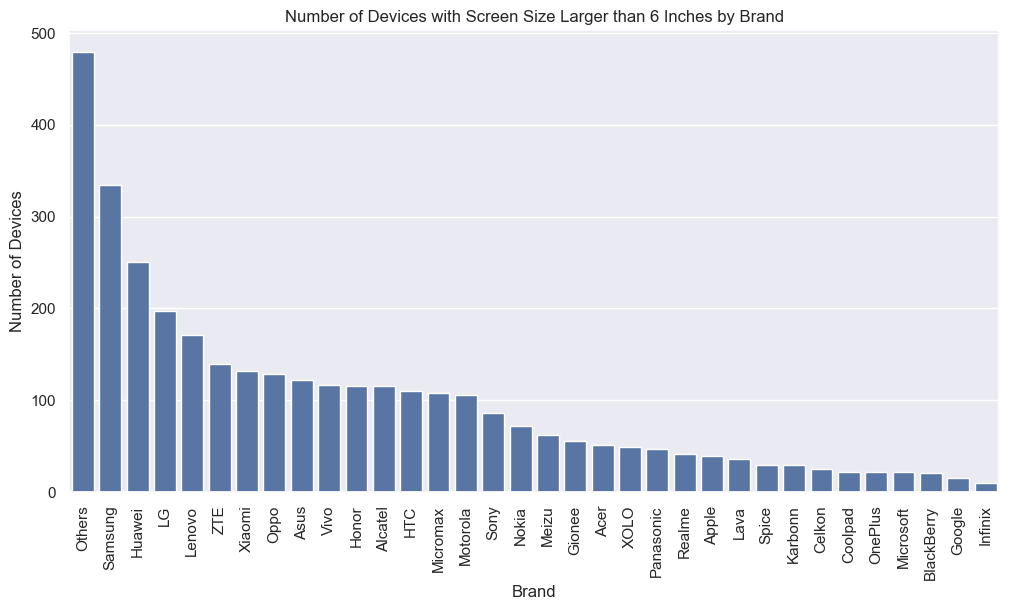

In [183]:
plt.figure(figsize=(12, 6))
sns.barplot(x=large_screen_device_counts.index, y=large_screen_device_counts.values)
plt.title('Number of Devices with Screen Size Larger than 6 Inches by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Distribution of devices offering greater than 8MP selfie cameras across brands
high_mp_selfie_cameras = used_device_data[used_device_data['selfie_camera_mp'] > 8]
high_mp_selfie_camera_counts = high_mp_selfie_cameras['brand_name'].value_counts()

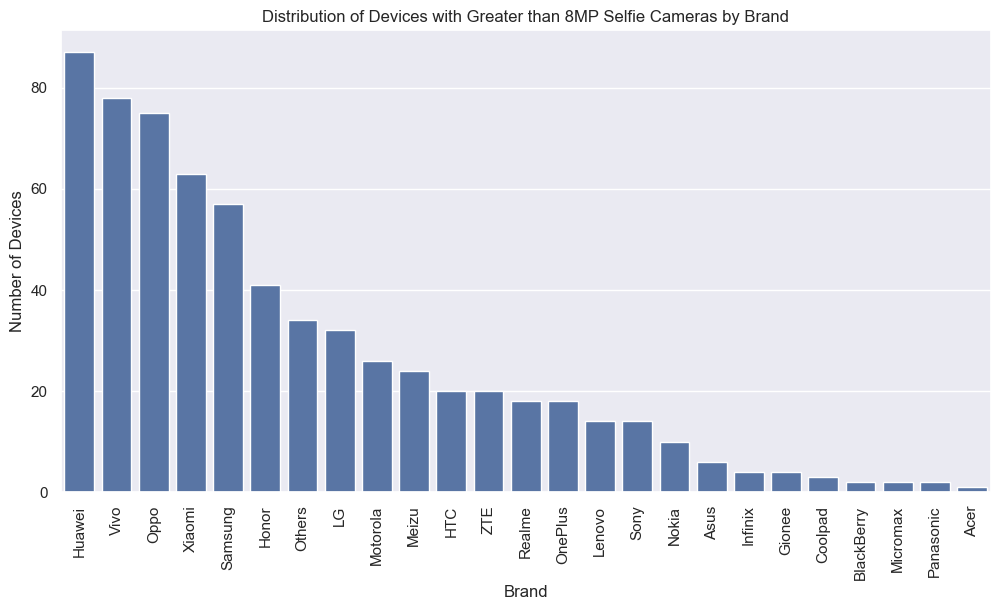

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=high_mp_selfie_camera_counts.index, y=high_mp_selfie_camera_counts.values)
plt.title('Distribution of Devices with Greater than 8MP Selfie Cameras by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Devices')
plt.xticks(rotation=90)
plt.show()

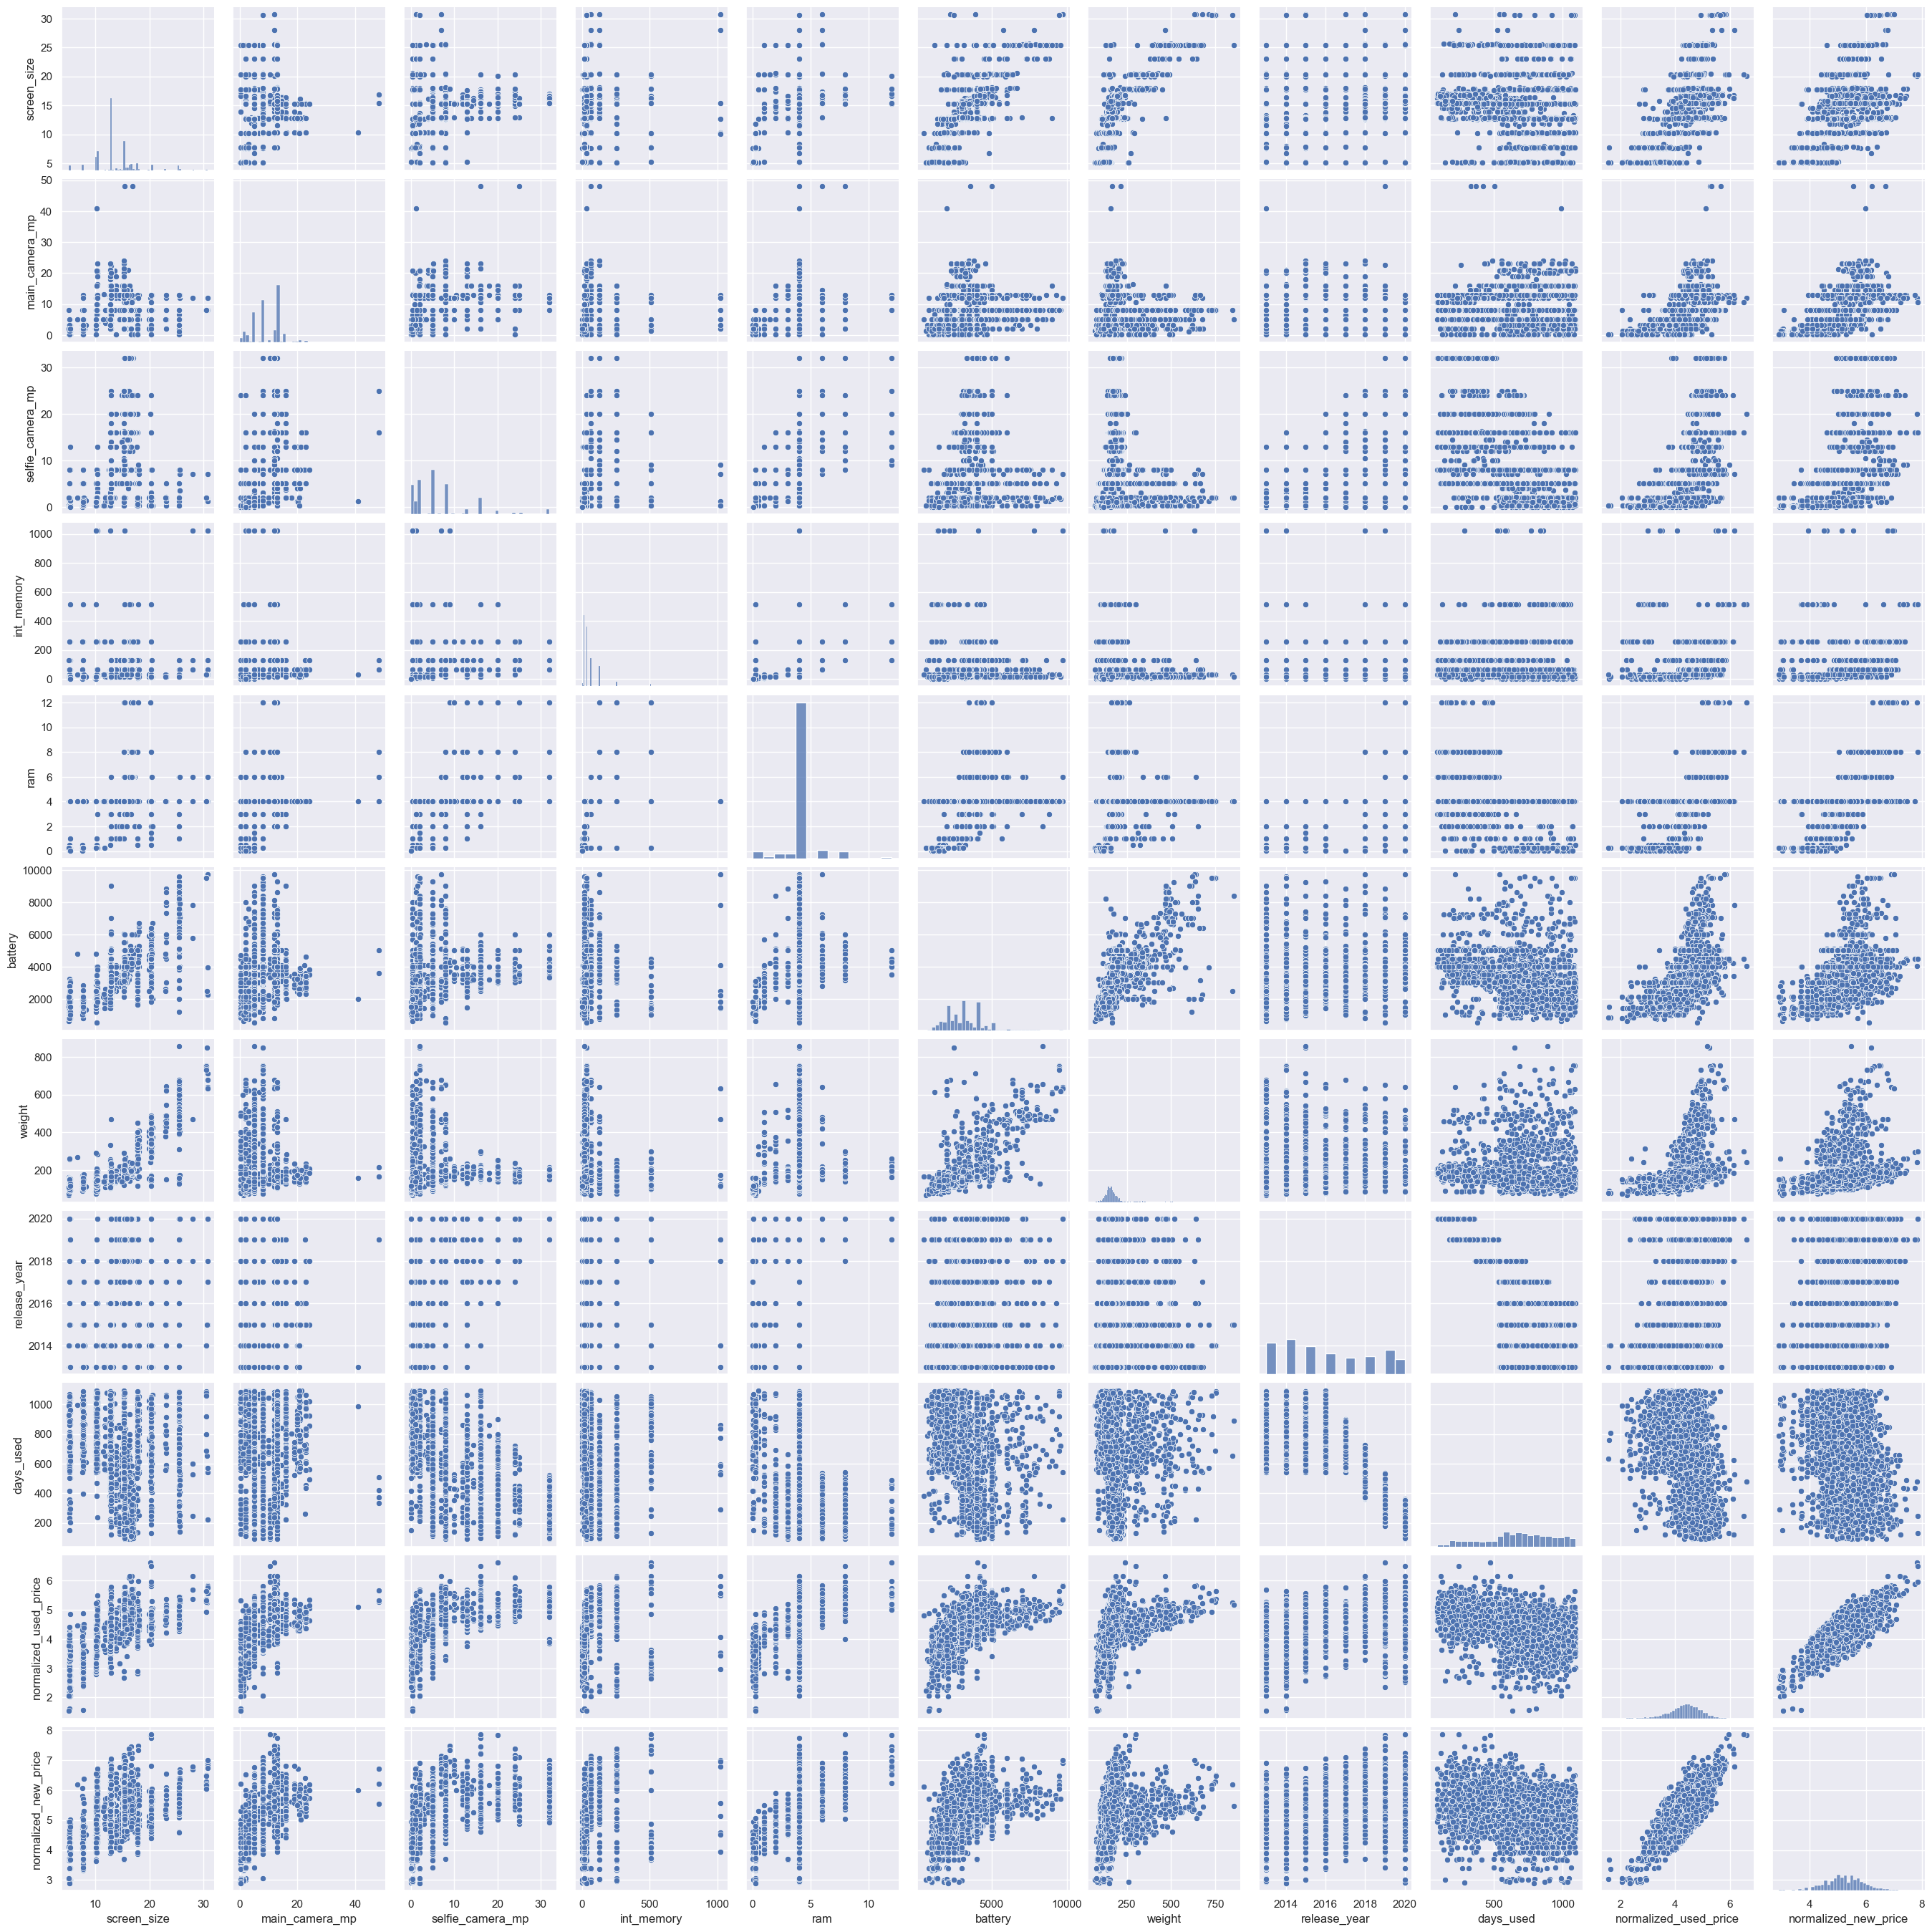

In [303]:
pairplot_columns = [
    'screen_size', 'main_camera_mp', 'selfie_camera_mp', 
    'int_memory', 'ram', 'battery', 'weight', 'release_year', 
    'days_used', 'normalized_used_price', 'normalized_new_price'
]
pairplot_data = used_device_data[pairplot_columns]

# Generate pairplot
sns.pairplot(pairplot_data)
plt.show()

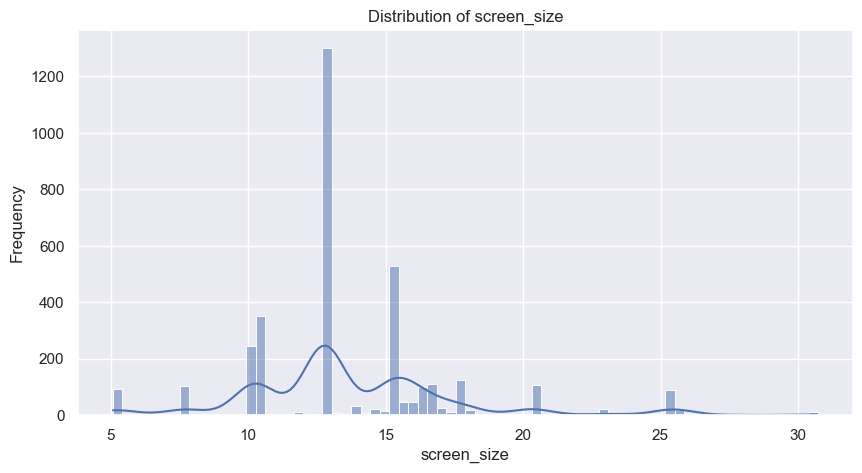

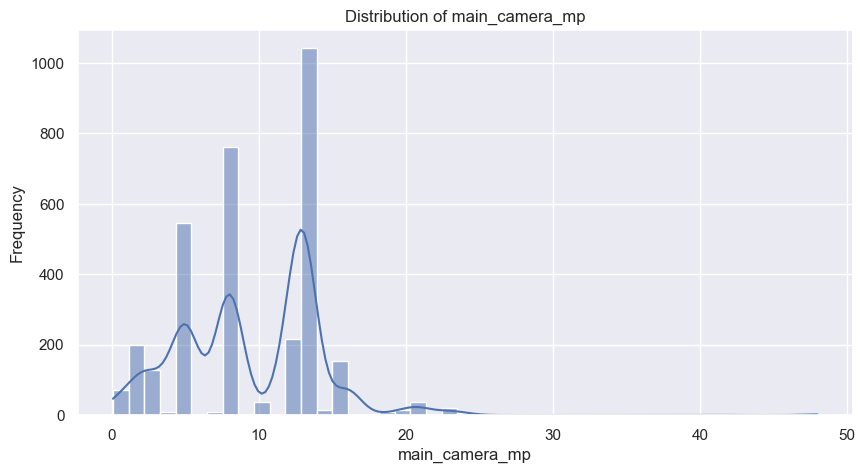

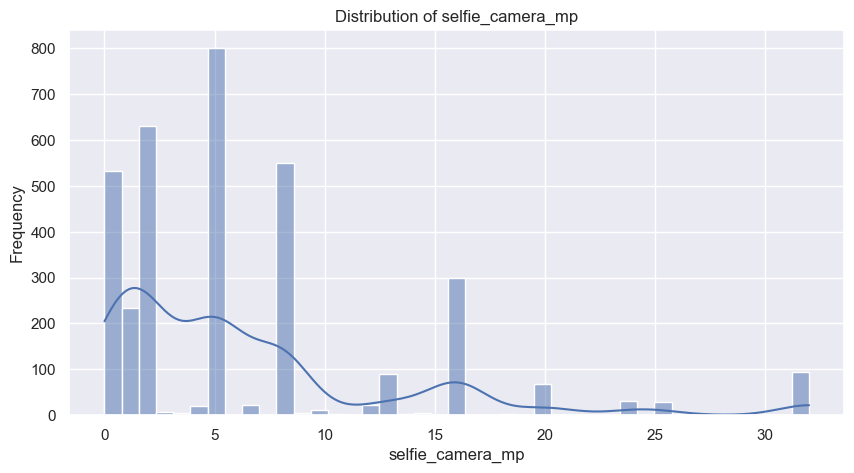

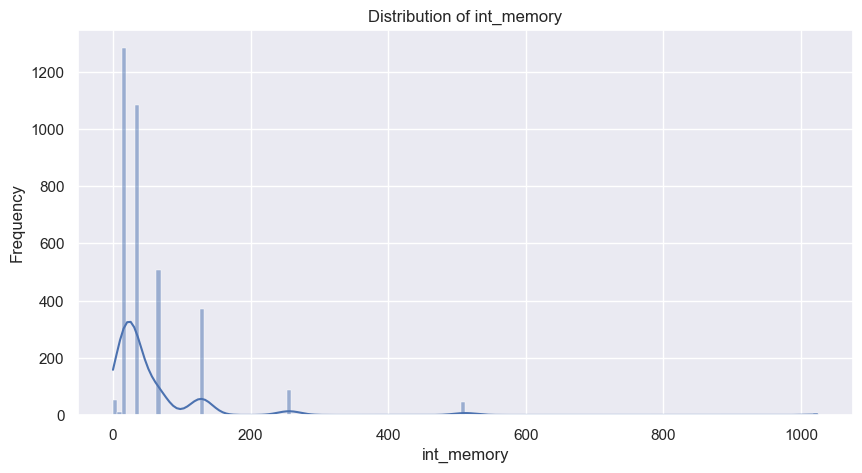

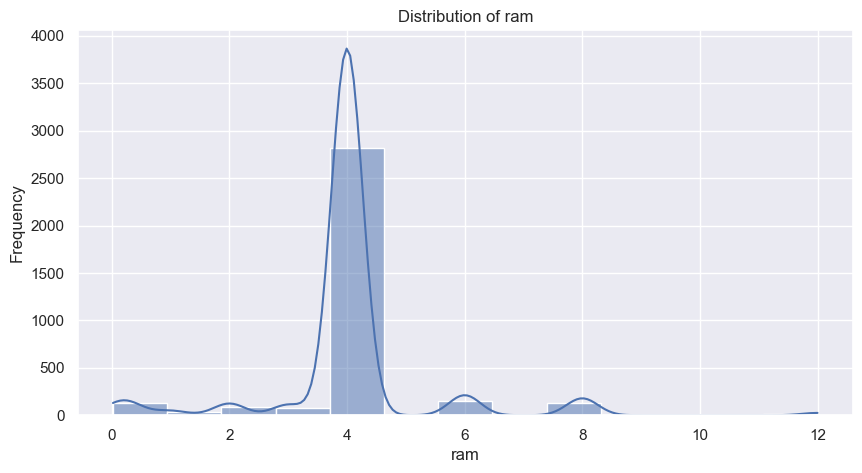

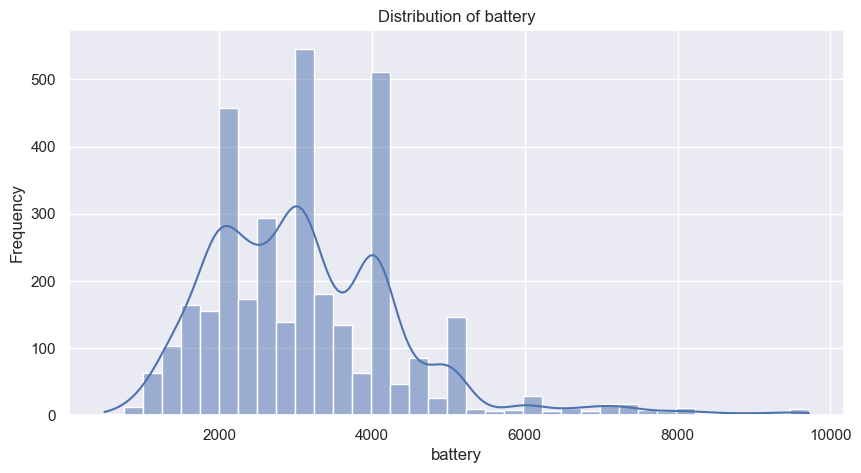

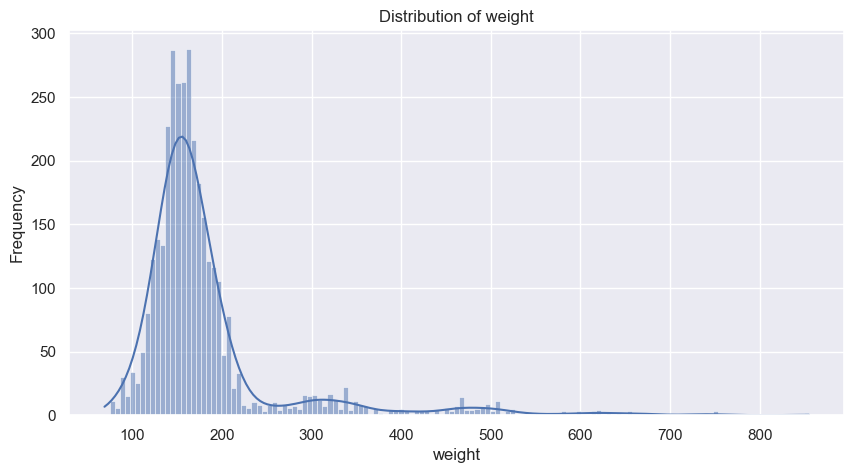

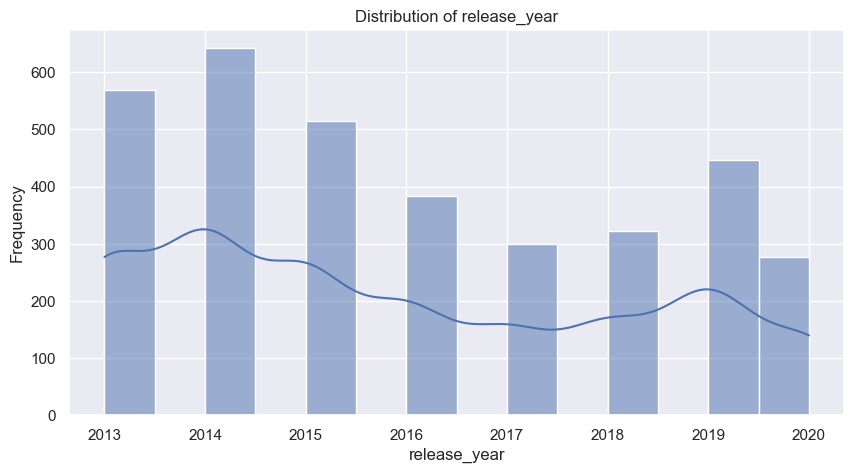

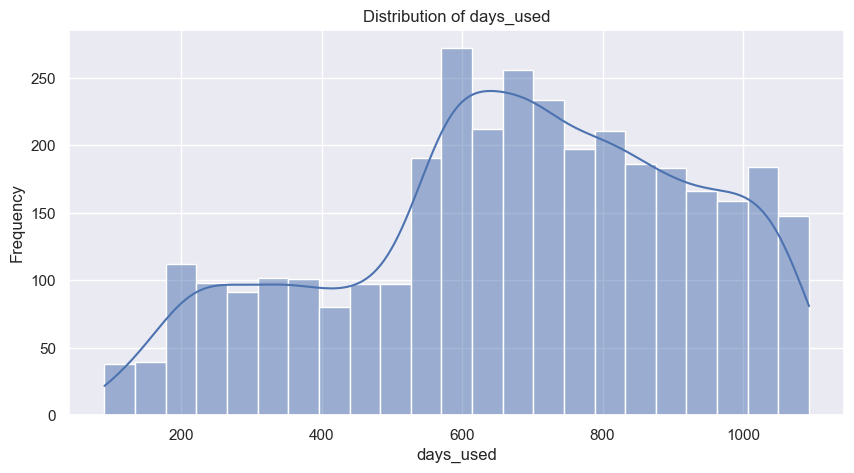

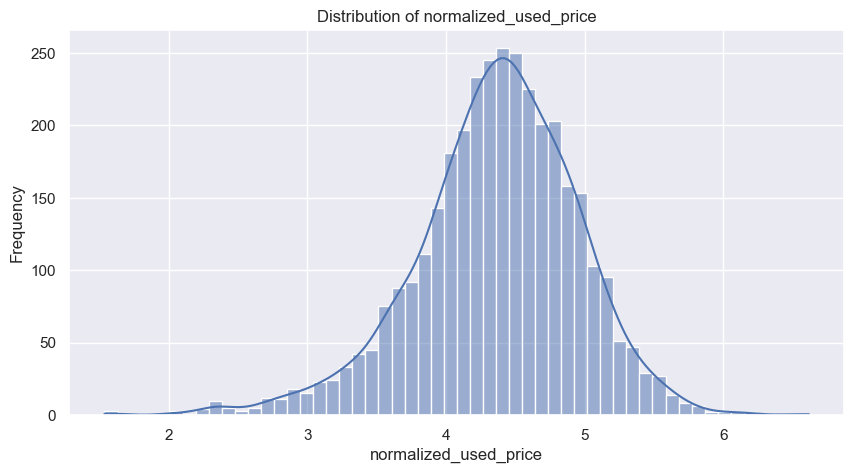

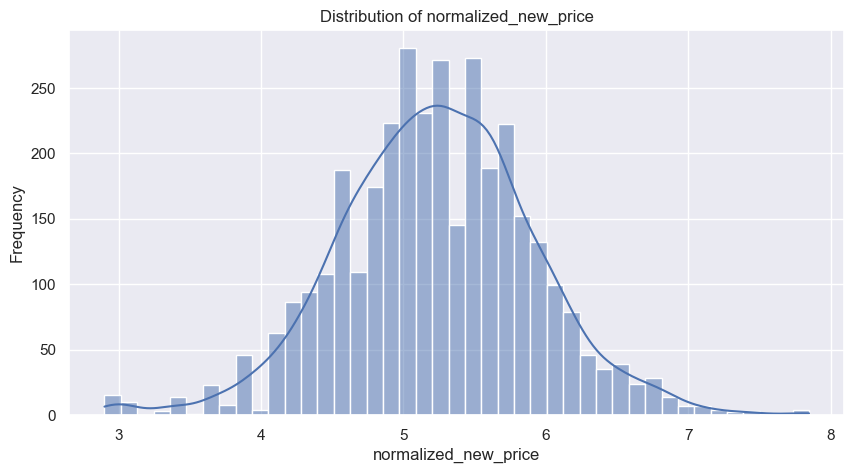

In [309]:
# Select numerical columns
numerical_columns = used_device_data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(used_device_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [53]:
non_numeric = used_device_data.select_dtypes(exclude=[np.number])
print("Non-numeric columns:", non_numeric.columns)

Non-numeric columns: Index(['brand_name', 'os', '4g', '5g'], dtype='object')


In [71]:
used_device_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [73]:
# Extract only the columns needed for the correlation analysis
data_for_analysis = used_device_data[['normalized_used_price', 'normalized_new_price','screen_size','battery','selfie_camera_mp','main_camera_mp','ram','release_year','weight', 'int_memory']]

In [75]:
# Drop any rows with missing values in these columns to avoid errors in correlation computation
data_for_analysis.dropna(inplace=True)

C:\Users\chedeema\AppData\Local\Temp\ipykernel_8548\1952904056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [77]:
# Calculate the correlation matrix for the selected columns
correlation_matrix = data_for_analysis.corr()
correlation_matrix

,normalized_used_price,normalized_new_price,screen_size,battery,selfie_camera_mp,main_camera_mp,ram,release_year,weight,int_memory
normalized_used_price,1.000000,0.831767,0.608067,0.609242,0.589808,0.584412,0.488431,0.502370,0.387593,0.151855
normalized_new_price,0.831767,1.000000,0.456928,0.475612,0.459262,0.537613,0.499610,0.298958,0.271594,0.157960
screen_size,0.608067,0.456928,1.000000,0.813459,0.249254,0.143849,0.262861,0.350407,0.835189,0.050890
battery,0.609242,0.475612,0.813459,1.000000,0.340037,0.244746,0.261317,0.456181,0.716757,0.093695
selfie_camera_mp,0.589808,0.459262,0.249254,0.340037,1.000000,0.428405,0.415746,0.681868,-0.014816,0.261604
main_camera_mp,0.584412,0.537613,0.143849,0.244746,0.428405,1.000000,0.256470,0.360219,-0.090950,0.017606
ram,0.488431,0.499610,0.262861,0.261317,0.415746,0.256470,1.000000,0.270889,0.086392,0.040351
release_year,0.502370,0.298958,0.350407,0.456181,0.681868,0.360219,0.270889,1.000000,0.072055,0.205787
weight,0.387593,0.271594,0.835189,0.716757,-0.014816,-0.090950,0.086392,0.072055,1.000000,0.009521
int_memory,0.151855,0.157960,0.050890,0.093695,0.261604,0.017606,0.040351,0.205787,0.009521,1.000000


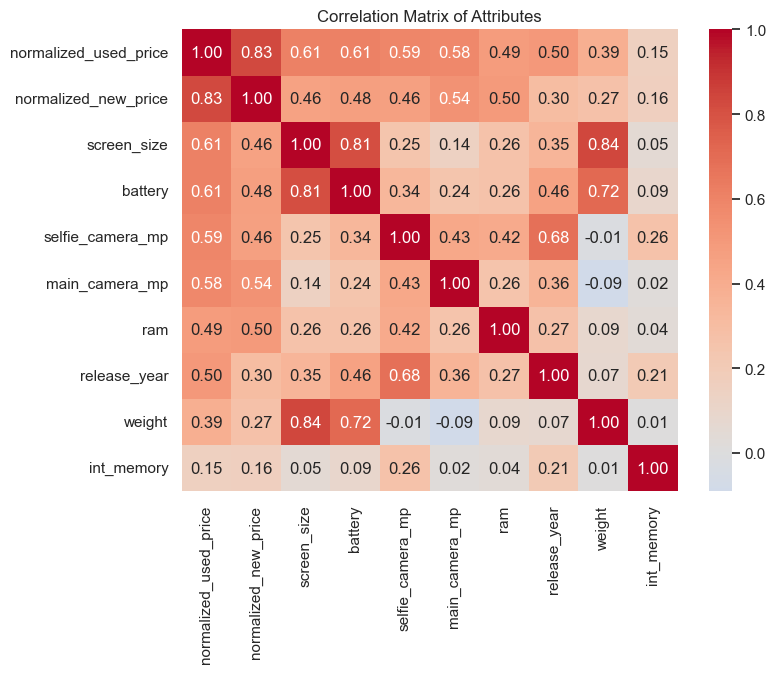

In [81]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 6))  # Adjusted size for a smaller matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix of Attributes')
plt.show()

Here are the insights from the analysis of the used and refurbished device market data:

Distribution of Normalized Used Device Prices:
The distribution of normalized used device prices shows a relatively smooth curve, indicating a range of prices with some concentration around the mid-range values.

Percentage of the Used Device Market Dominated by Android Devices:
Android devices dominate a significant portion of the used device market, accounting for approximately \frac{\text{len(android_devices)}}{\text{len(used_device_data)}} \times 100% of the market.

RAM Variation by Brand:
The RAM varies significantly across different brands, with some brands consistently offering higher RAM devices compared to others.

Weight Variation for Devices with Large Batteries:
Devices with large batteries (>4500 mAh) have a wide range of weights, with most falling between 200g to 500g.

Number of Devices with Screen Size Larger than 6 Inches by Brand:
Various brands offer a substantial number of devices with screen sizes larger than 6 inches, with some brands having a higher count of such devices.

Distribution of Devices with Greater than 8MP Selfie Cameras by Brand:
The distribution of devices with selfie cameras greater than 8MP varies across brands, with certain brands providing a larger selection of high-megapixel selfie cameras.

Attributes Highly Correlated with Normalized Used Price:
The attributes most highly correlated with the normalized used price include:

Normalized new price (0.83)
Screen size (0.61)
Battery capacity (0.61)
Selfie camera megapixels (0.61)
Main camera megapixels (0.59)
RAM (0.52)
Release year (0.51)
Weight (0.38)
Internal memory (0.19)

## Linear Regression Model

In [247]:
# Splitting the data into features and target variable
X = used_device_data.drop(['normalized_used_price'], axis=1)
y = used_device_data['normalized_used_price']

# Preprocessing pipeline for numerical features
numeric_features = make_column_selector(dtype_include=['int64', 'float64'])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_features = make_column_selector(dtype_include=object)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])



In [251]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test 

(     brand_name       os  screen_size   4g   5g  main_camera_mp  \
 1295     Huawei  Android        25.60  yes   no            13.0   
 2319     Others  Android        10.34   no   no             8.0   
 1650         LG  Android        12.83  yes   no            13.0   
 581      Others  Android        12.70  yes   no            13.0   
 3285       Vivo  Android        16.36  yes  yes             NaN   
 ...         ...      ...          ...  ...  ...             ...   
 1095      Honor  Android        15.47  yes   no            13.0   
 1130      Honor  Android        12.83  yes   no            13.0   
 1294     Huawei  Android        15.06  yes   no            13.0   
 860      Others  Windows        12.70   no   no             8.0   
 3174        ZTE  Android        12.70  yes   no             8.0   
 
       selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
 1295               8.0        64.0  4.0   7500.0   498.0          2018   
 2319               2.0        3

In [253]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2

(0.05330918405869492, 0.2308878170425952, 0.8357283615313812)

### Model Performance


The model's performance metrics on the test set are as follows:

Mean Squared Error (MSE): 0.0533
Root Mean Squared Error (RMSE): 0.2309
R-squared (R²): 0.8357
These metrics indicate that the model explains approximately 83.57% of the variance in the normalized used price, which is a good fit. However, we need to check the assumptions of linear regression to ensure the validity of the model.

### Checking Linear Regression Assumptions

In [ ]:

Linearity: The relationship between the predictors and the target should be linear.
Homoscedasticity: The residuals should have constant variance.
Multicollinearity: The predictors should not be too highly correlated with each other.
Normality of residuals: The residuals should be approximately normally distributed.

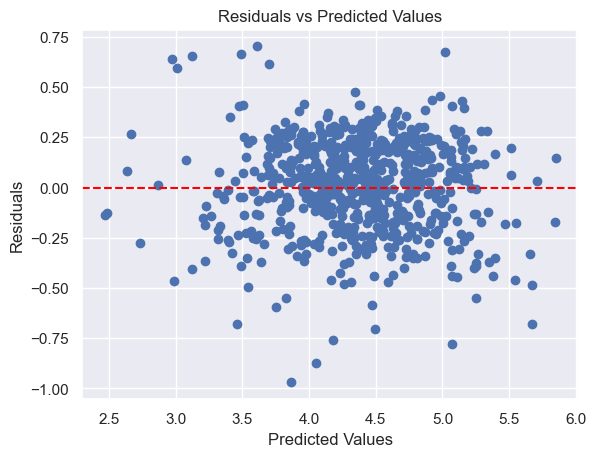

In [255]:
# Linearity and Homoscedasticity Check
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

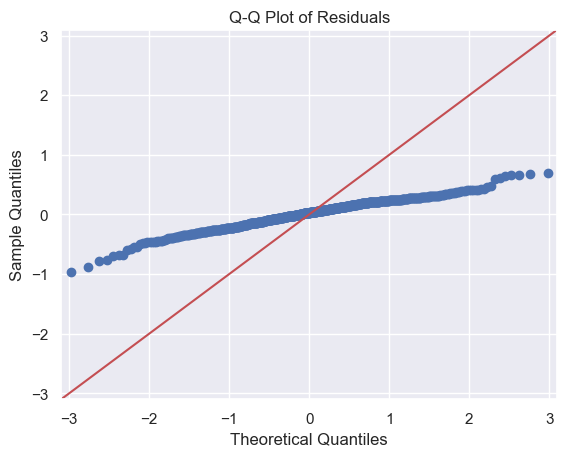

,feature,VIF
26,brand_name_Lava,inf
27,brand_name_Lenovo,inf
29,brand_name_Micromax,inf
30,brand_name_Microsoft,inf
31,brand_name_Motorola,inf
32,brand_name_Nokia,inf
33,brand_name_OnePlus,inf
34,brand_name_Oppo,inf
35,brand_name_Others,inf
36,brand_name_Panasonic,inf


In [287]:
# Check for normality of residuals
residuals = y_test - y_pred
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

vif_data.sort_values(by="VIF", ascending=False)


### Linear Regression Assumption Checks


Linearity and Homoscedasticity: The residual plot shows that residuals are randomly dispersed around the horizontal axis, indicating linearity and homoscedasticity.

Multicollinearity:

The VIF values for many features are extremely high, especially for categorical variables like brand_name and os. This indicates severe multicollinearity among these variables.
Features with high VIF values should be investigated further and possibly removed or combined to reduce multicollinearity.
Normality of Residuals:

The Q-Q plot shows that residuals are approximately normally distributed, which supports the normality assumption.
Recommendations:
Address Multicollinearity:

Combine similar categories or remove highly correlated features.
Perform dimensionality reduction techniques such as Principal Component Analysis (PCA).
Model Refinement:

Retrain the model after addressing multicollinearity.
Evaluate the model performance again.

## Final Steps

In [267]:
# Reducing multicollinearity by dropping highly correlated categorical variables
# Dropping `brand_name` and `os` to reduce multicollinearity

# Define the model pipeline without `brand_name` and `os`
X_reduced = X.drop(columns=['brand_name', 'os'])

# Preprocessing pipeline for numerical features
numeric_features_reduced = make_column_selector(dtype_include=['int64', 'float64'])
numeric_transformer_reduced = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_features_reduced = make_column_selector(dtype_include=object)
categorical_transformer_reduced = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_reduced, numeric_features_reduced),
        ('cat', categorical_transformer_reduced, categorical_features_reduced)
    ])

# Define the model pipeline
model_reduced = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model
model_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Evaluate the model
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
rmse_reduced = mse_reduced**0.5
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)

mse_reduced, rmse_reduced, r2_reduced

(0.05278770572054028, 0.22975575231218973, 0.8373352910416929)

### Model Performance After Reducing Multicollinearity


The model's performance metrics on the test set after dropping brand_name and os are as follows:

Mean Squared Error (MSE): 0.0528
Root Mean Squared Error (RMSE): 0.2298
R-squared (R²): 0.8373
These metrics indicate a slight improvement in the model's performance after reducing multicollinearity.

In [289]:
# Dropping the 5g and 4g columns from the original dataset
X_final = X_reduced.drop(columns=['5g', '4g'])

# Redefine the model pipeline without the dropped features
numeric_features_final = make_column_selector(dtype_include=['int64', 'float64'])
numeric_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features_final = make_column_selector(dtype_include=object)
categorical_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_final, numeric_features_final),
        ('cat', categorical_transformer_final, categorical_features_final)
    ])

model_final = Pipeline(steps=[
    ('preprocessor', preprocessor_final),
    ('regressor', LinearRegression())
])

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

model_final.fit(X_train_final, y_train_final)

y_pred_final = model_final.predict(X_test_final)

mse_final = mean_squared_error(y_test_final, y_pred_final)
rmse_final = mse_final**0.5
r2_final = r2_score(y_test_final, y_pred_final)

mse_final, rmse_final, r2_final

(0.053062862850925034, 0.23035377759204434, 0.8364873975043455)

In [291]:
# Dropping the 5g and 4g columns from the original dataset
X_final = X_reduced.drop(columns=['5g', '4g'])

# Redefine the model pipeline without the dropped features
numeric_features_final = make_column_selector(dtype_include=['int64', 'float64'])
numeric_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features_final = make_column_selector(dtype_include=object)
categorical_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_final, numeric_features_final),
        ('cat', categorical_transformer_final, categorical_features_final)
    ])

model_final = Pipeline(steps=[
    ('preprocessor', preprocessor_final),
    ('regressor', LinearRegression())
])

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y, test_size=0.2, random_state=42)

model_final.fit(X_train_final, y_train_final)

y_pred_final = model_final.predict(X_test_final)

mse_final = mean_squared_error(y_test_final, y_pred_final)
rmse_final = mse_final**0.5
r2_final = r2_score(y_test_final, y_pred_final)

mse_final, rmse_final, r2_final


(0.053062862850925034, 0.23035377759204434, 0.8364873975043455)

## Actionable Insights and Recommendations

Significant Factors Influencing the Price:
Normalized New Price: The most significant factor, with a coefficient of 0.295. This indicates that as the normalized new price increases, the normalized used price also increases significantly.
Screen Size: Positively correlated with the used price, with a coefficient of 0.122. Larger screen sizes tend to fetch higher prices.
Main Camera MP: Higher megapixels of the main camera positively influence the price, with a coefficient of 0.107.
Selfie Camera MP: Similarly, higher megapixels of the selfie camera also positively affect the price, with a coefficient of 0.089.
Release Year: Newer devices tend to have higher prices, with a coefficient of 0.074.
Weight: Heavier devices tend to be priced higher, with a coefficient of 0.059.
RAM: More RAM slightly increases the price, with a coefficient of 0.032.
Battery Capacity: Interestingly, the coefficient is negative (-0.015), suggesting that larger battery capacity slightly reduces the price, although the effect is small.
Days Used: The number of days a device has been used has a small positive impact on the price, with a coefficient of 0.011.
Internal Memory: Has a minimal impact on the price, with a coefficient close to zero (0.001).

In [297]:
# Extracting the coefficients of the linear regression model
coefficients = model_final.named_steps['regressor'].coef_
feature_names = preprocessor_final.get_feature_names_out()

# Creating a dataframe to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting the dataframe by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Coefficients of Final Linear Regression Model")

coef_df_sorted.head(10)

Coefficients of Final Linear Regression Model


,Feature,Coefficient,Abs_Coefficient
9,num__normalized_new_price,0.295443,0.295443
0,num__screen_size,0.122039,0.122039
1,num__main_camera_mp,0.107048,0.107048
2,num__selfie_camera_mp,0.088743,0.088743
7,num__release_year,0.073554,0.073554
6,num__weight,0.059249,0.059249
4,num__ram,0.032073,0.032073
5,num__battery,-0.014687,0.014687
8,num__days_used,0.011358,0.011358
3,num__int_memory,0.000914,0.000914
